# IMPORT

In [162]:
import pandas as pd
from _data_manager import DataManager
from _trade import Trade
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from _strategy_linear_regression import StrategyLinearRegression

from _backtesting import Backtest



In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DATA ANALYSIS

To view the data, launch the dashboard, which offers numerous data visualizations.

In [34]:
file_path = 'EGB_historical_yield.csv'
data_manager = DataManager(file_path)


            Germany_5y-Germany_10y  Germany_5y-Germany_30y  \
date                                                         
2016-01-15                   -70.3                  -147.6   
2016-01-18                   -70.2                  -147.8   
2016-01-19                   -71.5                  -148.9   
2016-01-20                   -67.9                  -142.3   
2016-01-21                   -68.9                  -145.4   
...                            ...                     ...   
2024-02-09                    -4.6                   -23.2   
2024-02-12                    -5.7                   -25.3   
2024-02-13                    -3.6                   -20.0   
2024-02-14                    -3.5                   -20.7   
2024-02-15                    -2.8                   -19.9   

            Germany_5y-Belgium_5y  Germany_5y-Belgium_10y  \
date                                                        
2016-01-15                  -14.3                  -100.2   
2016-01-18

/Users/martialgil/Desktop/COURS/Backtesting/Govies_Quant_Trading/Project/data_manager.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  diff_series = (df[colA] - df[colB]).rename(column_name)
/Users/martialgil/Desktop/COURS/Backtesting/Govies_Quant_Trading/Project/data_manager.py:84: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  diff_series = (df[colA] - df[colB]).rename(column_name)
/Users/martialgil/Desktop/COURS/Backtesting/Govies_Quant_Trading/Project/data_manager.py:84: PerformanceWarning: DataFrame is highly fragmented.

In [4]:
data_manager.data.shape

(2110, 21)

In [5]:
data_manager.data.head()

,Germany_5y,Germany_10y,Germany_30y,Belgium_5y,Belgium_10y,Belgium_30y,Austria_5y,Austria_10y,Austria_30y,Netherlands_5y,...,Netherlands_30y,France_5y,France_10y,France_30y,Spain_5y,Spain_10y,Spain_30y,Italy_5y,Italy_10y,Italy_30y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,-16.4,53.9,131.2,-2.1,83.8,189.7,-8,77.7,160.4,-10.4,...,143.6,-10.4,66.1,143.6,65.4,175.0,291.2,56.1,156.4,264.9
2016-01-18,-16.6,53.6,131.2,-3.3,83.5,190.0,-8,77.4,160.7,-10.6,...,143.9,-10.6,66.0,143.9,64.0,174.0,291.5,56.6,156.4,266.9
2016-01-19,-16.7,54.8,132.2,-4.1,84.0,189.9,-8,78.3,161.8,-11.3,...,145.1,-11.3,66.1,145.1,60.5,170.1,288.2,55.3,155.7,265.2
2016-01-20,-19.8,48.1,122.5,-6.0,96.3,184.2,-11,73.2,153.1,-13.8,...,135.9,-13.8,60.9,135.9,65.7,178.2,296.7,62.2,164.9,275.9
2016-01-21,-24.0,44.9,121.4,-9.8,91.5,180.5,-16,69.6,153.0,-18.2,...,134.8,-18.2,57.0,134.8,60.2,171.9,291.5,54.4,156.1,269.5


In [6]:
data_manager.data.dtypes

Germany_5y         float64
Germany_10y        float64
Germany_30y        float64
Belgium_5y         float64
Belgium_10y        float64
Belgium_30y        float64
Austria_5y           int64
Austria_10y        float64
Austria_30y        float64
Netherlands_5y     float64
Netherlands_10y    float64
Netherlands_30y    float64
France_5y          float64
France_10y         float64
France_30y         float64
Spain_5y           float64
Spain_10y          float64
Spain_30y          float64
Italy_5y           float64
Italy_10y          float64
Italy_30y          float64
dtype: object

For the Austria 5-year rates, we only have `int64` data types, which likely indicates a lack of precision in this measurement compared to others. Given 2110 rows, the probability of having only integer numbers is virtually zero.

In [7]:
data_manager.data.isnull().sum().sort_values().head(3)

Germany_5y    0
Italy_5y      0
Spain_30y     0
dtype: int64

There are no missing data, which is good news.

In [15]:
import pandas as pd


def create_all_dict(dataset):
    resultat = {}
    for position in dataset.index:
        resultat[position] = comparer_criteres(position,dataset)
    return resultat


def comparer_criteres(ligne, dataset):
    """
    Retourne un dictionnaire où chaque clé est une colonne du dataset, et la valeur est un dictionnaire avec deux clés :
    "mieux_classe" et "moins_classe", contenant les listes des colonnes mieux classées et moins bien classées respectivement.
    
    :param ligne: L'index de la ligne à analyser dans le dataset.
    :param dataset: Le DataFrame Pandas contenant le dataset.
    :return: Dictionnaire de comparaison des critères.
    """
    
    resultat = {}
    valeurs_ligne = dataset.loc[ligne]
    
    for colonne in dataset.columns:
        print(colonne)
        mieux_classe = []
        moins_classe = []
        
        for autre_colonne in dataset.columns:
            if autre_colonne == colonne:
                continue  # On ne compare pas la colonne avec elle-même.
            if valeurs_ligne[colonne] > valeurs_ligne[autre_colonne]:
                mieux_classe.append(autre_colonne)
            elif valeurs_ligne[colonne] < valeurs_ligne[autre_colonne]:
                moins_classe.append(autre_colonne)
            else:
                continue #si la colonne est classé comme la notre
        
        resultat[colonne] = {
            "mieux_classe": mieux_classe,
            "moins_classe": moins_classe
        }
    
    return resultat

# Exemple d'utilisation
# Supposons que `df` est votre DataFrame Pandas contenant le dataset.
# ligne_index est l'index de la ligne que vous voulez analyser.
# resultat = comparer_criteres(ligne_index, df)
# print(resultat)


In [17]:
dic =create_all_dict( data_manager.rank_data)


Germany_5y
Germany_10y
Germany_30y
Belgium_5y
Belgium_10y
Belgium_30y
Austria_5y
Austria_10y
Austria_30y
Netherlands_5y
Netherlands_10y
Netherlands_30y
France_5y
France_10y
France_30y
Spain_5y
Spain_10y
Spain_30y
Italy_5y
Italy_10y
Italy_30y
Germany_5y
Germany_10y
Germany_30y
Belgium_5y
Belgium_10y
Belgium_30y
Austria_5y
Austria_10y
Austria_30y
Netherlands_5y
Netherlands_10y
Netherlands_30y
France_5y
France_10y
France_30y
Spain_5y
Spain_10y
Spain_30y
Italy_5y
Italy_10y
Italy_30y
Germany_5y
Germany_10y
Germany_30y
Belgium_5y
Belgium_10y
Belgium_30y
Austria_5y
Austria_10y
Austria_30y
Netherlands_5y
Netherlands_10y
Netherlands_30y
France_5y
France_10y
France_30y
Spain_5y
Spain_10y
Spain_30y
Italy_5y
Italy_10y
Italy_30y
Germany_5y
Germany_10y
Germany_30y
Belgium_5y
Belgium_10y
Belgium_30y
Austria_5y
Austria_10y
Austria_30y
Netherlands_5y
Netherlands_10y
Netherlands_30y
France_5y
France_10y
France_30y
Spain_5y
Spain_10y
Spain_30y
Italy_5y
Italy_10y
Italy_30y
Germany_5y
Germany_10y
Germany_3

In [23]:
dic[data_manager.rank_data.index[0]]

{'Germany_5y': {'mieux_classe': [],
  'moins_classe': ['Germany_10y',
   'Germany_30y',
   'Belgium_5y',
   'Belgium_10y',
   'Belgium_30y',
   'Austria_5y',
   'Austria_10y',
   'Austria_30y',
   'Netherlands_5y',
   'Netherlands_10y',
   'Netherlands_30y',
   'France_5y',
   'France_10y',
   'France_30y',
   'Spain_5y',
   'Spain_10y',
   'Spain_30y',
   'Italy_5y',
   'Italy_10y',
   'Italy_30y']},
 'Germany_10y': {'mieux_classe': ['Germany_5y',
   'Belgium_5y',
   'Austria_5y',
   'Netherlands_5y',
   'France_5y'],
  'moins_classe': ['Germany_30y',
   'Belgium_10y',
   'Belgium_30y',
   'Austria_10y',
   'Austria_30y',
   'Netherlands_10y',
   'Netherlands_30y',
   'France_10y',
   'France_30y',
   'Spain_5y',
   'Spain_10y',
   'Spain_30y',
   'Italy_5y',
   'Italy_10y',
   'Italy_30y']},
 'Germany_30y': {'mieux_classe': ['Germany_5y',
   'Germany_10y',
   'Belgium_5y',
   'Belgium_10y',
   'Austria_5y',
   'Austria_10y',
   'Netherlands_5y',
   'Netherlands_10y',
   'France_5y',


In [22]:
data_manager.rank_data.index[0]

Timestamp('2016-01-15 00:00:00')

In [24]:
import itertools

# Liste initiale
liste_initiale = [1, 2, 3]

# Utiliser itertools.combinations pour obtenir toutes les paires possibles
paires_possibles = list(itertools.combinations(liste_initiale, 2))

paires_possibles


[(1, 2), (1, 3), (2, 3)]

In [26]:
import pandas as pd
import itertools

# Créer un DataFrame de pandas pour l'exemple
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}
df = pd.DataFrame(data)

# Obtenir les noms des colonnes
noms_colonnes = df.columns

# Utiliser itertools.combinations pour obtenir toutes les paires possibles de noms de colonnes
paires_colonnes = list(itertools.combinations(noms_colonnes, 2))

paires_colonnes


# Créer un nouveau DataFrame pour stocker les résultats
df_diff = pd.DataFrame()

# Calculer la différence pour chaque paire de colonnes et ajouter au nouveau DataFrame
for colA, colB in paires_colonnes:
    nom_colonne = f"{colA}-{colB}"
    df_diff[nom_colonne] = df[colA] - df[colB]

df_diff


,A-B,A-C,B-C
0,-3,-6,-3
1,-3,-6,-3
2,-3,-6,-3


In [35]:
data_manager.spread_yield

,Germany_5y-Germany_10y,Germany_5y-Germany_30y,Germany_5y-Belgium_5y,Germany_5y-Belgium_10y,Germany_5y-Belgium_30y,Germany_5y-Austria_5y,Germany_5y-Austria_10y,Germany_5y-Austria_30y,Germany_5y-Netherlands_5y,Germany_5y-Netherlands_10y,...,Spain_10y-Spain_30y,Spain_10y-Italy_5y,Spain_10y-Italy_10y,Spain_10y-Italy_30y,Spain_30y-Italy_5y,Spain_30y-Italy_10y,Spain_30y-Italy_30y,Italy_5y-Italy_10y,Italy_5y-Italy_30y,Italy_10y-Italy_30y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,-70.3,-147.6,-14.3,-100.2,-206.1,-8.4,-94.1,-176.8,-6.0,-82.5,...,-116.2,118.9,18.6,-89.9,235.1,134.8,26.3,-100.3,-208.8,-108.5
2016-01-18,-70.2,-147.8,-13.3,-100.1,-206.6,-8.6,-94.0,-177.3,-6.0,-82.6,...,-117.5,117.4,17.6,-92.9,234.9,135.1,24.6,-99.8,-210.3,-110.5
2016-01-19,-71.5,-148.9,-12.6,-100.7,-206.6,-8.7,-95.0,-178.5,-5.4,-82.8,...,-118.1,114.8,14.4,-95.1,232.9,132.5,23.0,-100.4,-209.9,-109.5
2016-01-20,-67.9,-142.3,-13.8,-116.1,-204.0,-8.8,-93.0,-172.9,-6.0,-80.7,...,-118.5,116.0,13.3,-97.7,234.5,131.8,20.8,-102.7,-213.7,-111.0
2016-01-21,-68.9,-145.4,-14.2,-115.5,-204.5,-8.0,-93.6,-177.0,-5.8,-81.0,...,-119.6,117.5,15.8,-97.6,237.1,135.4,22.0,-101.7,-215.1,-113.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,-4.6,-23.2,-32.1,-66.9,-116.2,-35.6,-59.2,-77.9,-20.3,-38.5,...,-60.0,-5.1,-59.7,-118.2,54.9,0.3,-58.2,-54.6,-113.1,-58.5
2024-02-12,-5.7,-25.3,-32.0,-66.8,-115.9,-35.7,-59.7,-79.3,-20.7,-39.5,...,-60.8,-3.1,-58.6,-117.6,57.7,2.2,-56.8,-55.5,-114.5,-59.0
2024-02-13,-3.6,-20.0,-32.0,-63.7,-109.0,-36.4,-57.1,-72.7,-20.7,-37.7,...,-57.1,-6.4,-60.1,-115.8,50.7,-3.0,-58.7,-53.7,-109.4,-55.7


In [45]:
data_manager.data["2016-01-15":"2016-01-21"].loc[:,['Germany_30y']]

,Germany_30y
date,
2016-01-15,131.2
2016-01-18,131.2
2016-01-19,132.2
2016-01-20,122.5
2016-01-21,121.4


In [47]:
trade = Trade("Germany_30y",1,1,"2016-01-15","2016-01-21")

In [53]:
def aggregate_country_averages(country_datasets):
    """
    Calculs les moyennes par lignes pour chaque pays et les rassemble dans un seul DataFrame.
    
    Parameters:
    - country_datasets: Un dictionnaire où les clés sont les noms des pays et les valeurs sont des DataFrames spécifiques à chaque pays.
    
    Returns:
    Un DataFrame où chaque colonne représente un pays et chaque ligne représente la moyenne de toutes les obligations pour ce pays à une date donnée.
    """
    averages_list = []
    
    for country, df in country_datasets.items():

        averages = df.mean(axis=1)
        averages.name = country
    
        averages_list.append(averages)
    
    merged_averages_df = pd.concat(averages_list, axis=1)
    
    return merged_averages_df

In [54]:
aggregate_country_averages(data_manager.data_by_country)

,Belgium,Netherlands,Spain,Germany,Italy,France,Austria
date,,,,,,,
2016-01-15,90.466667,66.433333,177.200000,56.233333,159.133333,66.433333,76.700000
2016-01-18,90.066667,66.433333,176.500000,56.066667,159.966667,66.433333,76.700000
2016-01-19,89.933333,66.633333,172.933333,56.766667,158.733333,66.633333,77.366667
2016-01-20,91.500000,61.000000,180.200000,50.266667,167.666667,61.000000,71.766667
2016-01-21,87.400000,57.866667,174.533333,47.433333,160.000000,57.866667,68.866667
...,...,...,...,...,...,...,...
2024-02-09,305.133333,268.100000,343.600000,242.666667,397.600000,268.100000,290.966667
2024-02-12,301.866667,266.100000,339.366667,240.633333,391.766667,266.100000,288.533333
2024-02-13,303.833333,268.833333,340.866667,243.466667,394.666667,268.833333,291.000000


In [52]:
data_manager.data.mean(axis=1)

date
2016-01-15     98.942857
2016-01-18     98.880952
2016-01-19     98.428571
2016-01-20     97.628571
2016-01-21     93.423810
                 ...    
2024-02-09    302.309524
2024-02-12    299.195238
2024-02-13    301.642857
2024-02-14    295.157143
2024-02-15    296.933333
Length: 2110, dtype: float64

In [57]:
trade = Trade("Germany_30y", -1, 1, "2016-01-15", "2016-01-21")

trade.daily_Pand_L(data_manager.data)

In [60]:
trade.p_and_l_data

,PandL_Germany_30y
date,
2016-01-15,0.0
2016-01-18,0.0
2016-01-19,1.0
2016-01-20,-8.7
2016-01-21,-9.8


In [63]:
pd.merge(data_manager.data[[]],trade.p_and_l_data,"left",left_index=True,right_index=True)

,PandL_Germany_30y
date,
2016-01-15,0.0
2016-01-18,0.0
2016-01-19,1.0
2016-01-20,-8.7
2016-01-21,-9.8
...,...
2024-02-09,NaN
2024-02-12,NaN
2024-02-13,NaN


In [64]:
import pandas as pd
import numpy as np

# Exemple de DataFrame
data = {'VotreColonne': [np.nan, np.nan, 1, np.nan, 2, np.nan, np.nan]}
df = pd.DataFrame(data)

# Remplacer les NaN précédant la première valeur non-NaN par 0
premiere_valeur_non_nan = df['VotreColonne'].first_valid_index()
df.loc[:premiere_valeur_non_nan, 'VotreColonne'] = df.loc[:premiere_valeur_non_nan, 'VotreColonne'].fillna(0)

# Remplacer les NaN suivant la première valeur non-NaN par la dernière valeur précédente non-NaN
for i in range(premiere_valeur_non_nan + 1, len(df)):
    if pd.isna(df.loc[i, 'VotreColonne']):
        df.loc[i, 'VotreColonne'] = df.loc[i-1, 'VotreColonne']

print(df)


   VotreColonne
0           0.0
1           0.0
2           1.0
3           1.0
4           2.0
5           2.0
6           2.0


In [67]:
data_manager.data.to_clipboard()

In [66]:
import pandas as pd
import numpy as np

# Exemple de DataFrame
data = {'VotreColonne': [3, np.nan, 1, np.nan, 2, np.nan, np.nan]}
df = pd.DataFrame(data)

# Vérifie si la première valeur est un NaN
if pd.isna(df['VotreColonne'].iloc[0]):
    # Trouve l'index de la première valeur non-NaN
    premiere_valeur_non_nan = df['VotreColonne'].first_valid_index()
    # Si toute la colonne n'est pas NaN, remplacer les NaN avant la première valeur non-NaN par 0
    if premiere_valeur_non_nan is not None:
        df.loc[0:premiere_valeur_non_nan, 'VotreColonne'] = df.loc[0:premiere_valeur_non_nan, 'VotreColonne'].fillna(0)
        # Pour chaque NaN après la première valeur non-NaN, le remplacer par la dernière valeur non-NaN
        for i in range(premiere_valeur_non_nan + 1, len(df)):
            if pd.isna(df.loc[i, 'VotreColonne']):
                df.loc[i, 'VotreColonne'] = df.loc[i-1, 'VotreColonne']
    else:
        # Si toute la colonne est NaN, remplacer tous par 0
        df['VotreColonne'].fillna(0, inplace=True)
else:
    # Si la première valeur n'est pas un NaN, procéder comme avant pour remplacer les NaN subséquents
    premiere_valeur_non_nan = df['VotreColonne'].first_valid_index()
    for i in range(premiere_valeur_non_nan + 1, len(df)):
        if pd.isna(df.loc[i, 'VotreColonne']):
            df.loc[i, 'VotreColonne'] = df.loc[i-1, 'VotreColonne']

print(df)


   VotreColonne
0           3.0
1           3.0
2           1.0
3           1.0
4           2.0
5           2.0
6           2.0


### Données économiques que l'on pourrait rajouter pour aller plus loin :

- Inflation
- Chômage
- PIB (Produit Intérieur Brut)
- Indice des prix à la consommation
- Indice des prix à la production (IPP)
- Balance commerciale
- Indices boursiers
- Indicateurs de sentiment de marché


In [36]:
def subsets(lst):
    if len(lst) == 0:
        return [[]]  # Le sous-ensemble vide est toujours présent

    first_elem = lst[0]
    rest_subsets = subsets(lst[1:])  # Appel récursif pour obtenir les sous-ensembles du reste de la liste
    new_subsets = []
    for subset in rest_subsets:
        new_subsets.append(subset)  # Ajouter le sous-ensemble sans le premier élément
        new_subsets.append([first_elem] + subset)  # Ajouter le sous-ensemble avec le premier élément
    return new_subsets

# Exemple d'utilisation
liste = [1, 2, 3]
print("Tous les sous-ensembles de", liste, "sont:", subsets(liste))


Tous les sous-ensembles de [1, 2, 3] sont: [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]


In [40]:
liste+[1]

[1, 2, 3, 1]

In [38]:
liste[0]

1

In [69]:
data_manager.spread_yield

,Germany_5y-Germany_10y,Germany_5y-Germany_30y,Germany_5y-Belgium_5y,Germany_5y-Belgium_10y,Germany_5y-Belgium_30y,Germany_5y-Austria_5y,Germany_5y-Austria_10y,Germany_5y-Austria_30y,Germany_5y-Netherlands_5y,Germany_5y-Netherlands_10y,...,Spain_10y-Spain_30y,Spain_10y-Italy_5y,Spain_10y-Italy_10y,Spain_10y-Italy_30y,Spain_30y-Italy_5y,Spain_30y-Italy_10y,Spain_30y-Italy_30y,Italy_5y-Italy_10y,Italy_5y-Italy_30y,Italy_10y-Italy_30y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15,-70.3,-147.6,-14.3,-100.2,-206.1,-8.4,-94.1,-176.8,-6.0,-82.5,...,-116.2,118.9,18.6,-89.9,235.1,134.8,26.3,-100.3,-208.8,-108.5
2016-01-18,-70.2,-147.8,-13.3,-100.1,-206.6,-8.6,-94.0,-177.3,-6.0,-82.6,...,-117.5,117.4,17.6,-92.9,234.9,135.1,24.6,-99.8,-210.3,-110.5
2016-01-19,-71.5,-148.9,-12.6,-100.7,-206.6,-8.7,-95.0,-178.5,-5.4,-82.8,...,-118.1,114.8,14.4,-95.1,232.9,132.5,23.0,-100.4,-209.9,-109.5
2016-01-20,-67.9,-142.3,-13.8,-116.1,-204.0,-8.8,-93.0,-172.9,-6.0,-80.7,...,-118.5,116.0,13.3,-97.7,234.5,131.8,20.8,-102.7,-213.7,-111.0
2016-01-21,-68.9,-145.4,-14.2,-115.5,-204.5,-8.0,-93.6,-177.0,-5.8,-81.0,...,-119.6,117.5,15.8,-97.6,237.1,135.4,22.0,-101.7,-215.1,-113.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09,-4.6,-23.2,-32.1,-66.9,-116.2,-35.6,-59.2,-77.9,-20.3,-38.5,...,-60.0,-5.1,-59.7,-118.2,54.9,0.3,-58.2,-54.6,-113.1,-58.5
2024-02-12,-5.7,-25.3,-32.0,-66.8,-115.9,-35.7,-59.7,-79.3,-20.7,-39.5,...,-60.8,-3.1,-58.6,-117.6,57.7,2.2,-56.8,-55.5,-114.5,-59.0
2024-02-13,-3.6,-20.0,-32.0,-63.7,-109.0,-36.4,-57.1,-72.7,-20.7,-37.7,...,-57.1,-6.4,-60.1,-115.8,50.7,-3.0,-58.7,-53.7,-109.4,-55.7


In [74]:




def detect_sign_changes(df):
    changes = pd.DataFrame(index=df.index, columns=df.columns)
    
    for col in df.columns:
        changes[col] = 0
        
        for i in range(1, len(df)):
            if df[col].iloc[i-1] >= 0 and df[col].iloc[i] < 0:
                changes[col].iloc[i] = -1
            elif df[col].iloc[i-1] < 0 and df[col].iloc[i] >= 0:
                changes[col].iloc[i] = 1
    
    return changes




data_signals= detect_sign_changes(data_manager.spread_yield)

<ipython-input-74-19448f9bb566>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes[col].iloc[i] = 1
<ipython-input-74-19448f9bb566>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  changes[col].iloc[i] = -1


In [72]:
mot = "exemple-de-mot"
mots_separes = mot.split("-")
print(mots_separes)


['exemple', 'de', 'mot']


In [76]:
data_signals.to_clipboard()

In [86]:
new_data = data_manager.data.diff(5)

In [87]:
new_data = new_data.dropna(axis=0)

In [128]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


df = new_data[new_data.index<"2017-03-01"]

# Initialisation du modèle de régression
model = LinearRegression()

# Pour stocker les résultats de la régression
results = []

# Boucle sur chaque colonne pour le processus de shift et régression
for column in df.columns:
    # Shift de la colonne de 5
    y = df[column].shift(-5)
    X = df.drop(columns=[column]).iloc[:-5] # On enlève la colonne actuelle et les 5 premières lignes pour correspondre à y
    y = y.dropna() # Suppression des NaN résultant du shift
    y.to_numpy()
    X.to_numpy()
    # Vérification si X et y ont des dimensions compatibles pour la régression
    if not X.empty and len(X) == len(y):
        model.fit(X, y)
        predictions = model.predict(X)
        mse = mean_squared_error(y, predictions)  # Calcul de la MSE
        rmse = np.sqrt(mse)  # Calcul de la RMSE
        # Sauvegarde des coefficients et de l'intercept
        result = {
            'column': column,
            'intercept': model.intercept_,
            'coefficients': model.coef_,
            'score': model.score(X, y),
             'MSE': mse,
            'RMSE': rmse        }
        results.append(result)

# Conversion des résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results)


In [129]:
results_df

,column,intercept,coefficients,score,MSE,RMSE
0,Germany_5y,-1.147637,"[1.1189676409412237, 0.01843378376560806, 0.32...",0.254458,21.471110,4.633693
1,Germany_10y,-1.022950,"[-0.4881824162718142, 1.3946990928380247, 0.19...",0.228937,47.620530,6.900763
2,Germany_30y,-1.419309,"[-0.9535278917172204, 2.173092272332669, 0.432...",0.251393,83.933046,9.161498
3,Belgium_5y,-0.692690,"[-0.2757102579381462, 0.8767943545593895, -0.0...",0.157559,38.069540,6.170052
4,Belgium_10y,-0.935191,"[-0.5808475222221086, 1.1892977257472919, -0.0...",0.145767,67.662720,8.225735
5,Belgium_30y,-1.226511,"[-0.7839265181404926, 2.0786496828349765, 0.28...",0.221497,97.701580,9.884411
6,Austria_5y,-0.878470,"[-0.6427813806889249, 0.5928699980088686, 0.15...",0.306721,19.441704,4.409275
7,Austria_10y,-1.268227,"[-0.5448529791294409, 1.184612121828432, 0.560...",0.262507,50.070844,7.076075
8,Austria_30y,-0.898405,"[-1.0539026205547595, 1.0438974920925048, 0.54...",0.222282,86.872038,9.320517
9,Netherlands_5y,-0.779696,"[-0.3516538294028194, 0.8390302826154823, 0.01...",0.207822,25.440295,5.043837


In [101]:
y.to_numpy()

array([ 6.1,  2.4, -0.6, ...,  2.6, 12.6, 16.3])

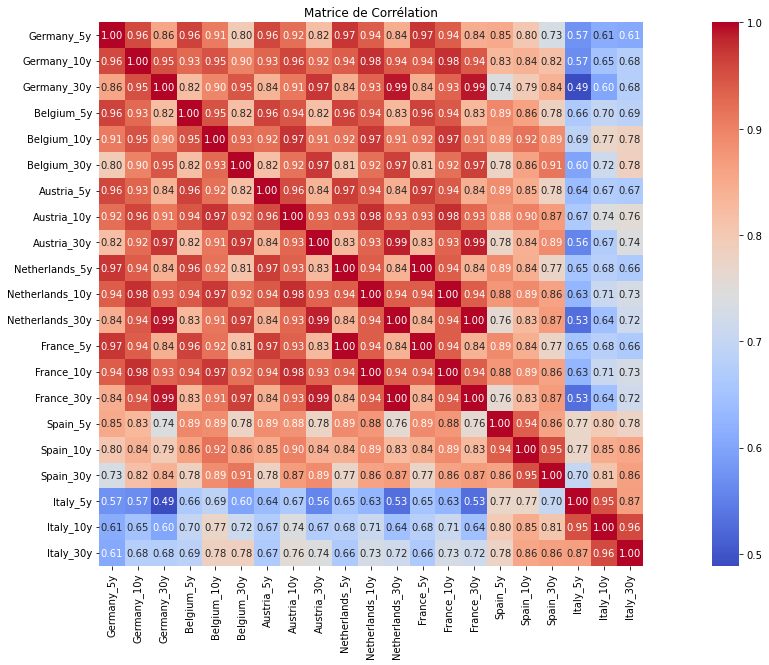

In [83]:
corr = new_data.corr()

plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Matrice de Corrélation')
plt.show()

In [111]:
df[column].shift(-5)

date
2016-01-22   -12.3
2016-01-25    -4.3
2016-01-26     2.7
2016-01-27    -1.1
2016-01-28     5.3
              ... 
2024-02-09     NaN
2024-02-12     NaN
2024-02-13     NaN
2024-02-14     NaN
2024-02-15     NaN
Name: Italy_30y, Length: 2105, dtype: float64

In [120]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Supposons que df soit votre DataFrame
df = new_data[new_data.index<"2017-03-01"]

# Pour stocker les résultats de la régression
results = []

# Définition de la grille de paramètres pour alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Boucle sur chaque colonne pour le processus de shift et régression
for column in df.columns:
    # Shift de la colonne de 5
    y = df[column].shift(-5)
    X = df.drop(columns=[column]).iloc[:-5]  # On enlève la colonne actuelle et les 5 dernières lignes pour correspondre à y
    y = y.dropna()  # Suppression des NaN résultant du shift
    y.to_numpy()
    X.to_numpy()
    
    # Vérification si X et y ont des dimensions compatibles pour la régression
    if not X.empty and len(X) == len(y):
        # Initialisation de GridSearchCV avec le modèle Ridge et la grille de paramètres
        model = GridSearchCV(Ridge(), param_grid, cv=5)  # cv=5 pour la validation croisée à 5 plis
        model.fit(X, y)
        
        # Meilleur modèle
        best_model = model.best_estimator_
        
        predictions = best_model.predict(X)
        mse = mean_squared_error(y, predictions)  # Calcul de la MSE
        rmse = np.sqrt(mse)  # Calcul de la RMSE
        
        # Sauvegarde des coefficients, de l'intercept et du meilleur alpha
        result = {
            'column': column,
            'best_alpha': model.best_params_['alpha'],
            'intercept': best_model.intercept_,
            'coefficients': best_model.coef_,
            'score': best_model.score(X, y),
            'MSE': mse,
            'RMSE': rmse
        }
        results.append(result)

# Conversion des résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results)


In [121]:
results_df

,column,best_alpha,intercept,coefficients,score,MSE,RMSE
0,Germany_5y,100,-1.039741,"[0.876484440768307, -0.06535397783573423, 0.25...",0.247109,21.682761,4.656475
1,Germany_10y,100,-0.908147,"[-0.4179362654524762, 0.7655170324098115, 0.12...",0.223851,47.934620,6.923483
2,Germany_30y,100,-1.239427,"[-0.8089937811586234, 1.7059163522877994, 0.32...",0.245574,84.585408,9.197033
3,Belgium_5y,100,-0.626828,"[-0.248826427698148, 0.7025067001079286, -0.02...",0.155922,38.143511,6.176043
4,Belgium_10y,100,-0.861398,"[-0.4694928596872946, 0.9629131683176186, -0.0...",0.143487,67.843318,8.236706
5,Belgium_30y,100,-1.037936,"[-0.6147729213587602, 1.6829526627000269, 0.13...",0.216469,98.332582,9.916279
6,Austria_5y,100,-0.812083,"[-0.571776602331349, 0.4660848396438005, 0.081...",0.304040,19.516891,4.417793
7,Austria_10y,100,-1.104898,"[-0.4843421471754603, 0.9362547820429665, 0.26...",0.257370,50.419632,7.100678
8,Austria_30y,100,-0.843477,"[-0.8937796092039252, 0.8998960644211214, 0.36...",0.220167,87.108265,9.333181
9,Netherlands_5y,100,-0.717770,"[-0.307743555483956, 0.6661122039141258, 0.013...",0.205220,25.523849,5.052113


In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Pour stocker les résultats de la régression
results = []

# Définition de la grille de paramètres pour alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Boucle sur chaque colonne pour le processus de shift et régression
for column in df.columns:
    # Shift de la colonne de 5
    y = df[column].shift(-5)
    X = df.drop(columns=[column]).iloc[:-5]  # On enlève la colonne actuelle et les 5 dernières lignes pour correspondre à y
    y = y.dropna()  # Suppression des NaN résultant du shift
    y.to_numpy()
    X.to_numpy()
    
    # Vérification si X et y ont des dimensions compatibles pour la régression
    if not X.empty and len(X) == len(y):
        # Initialisation de GridSearchCV avec le modèle Lasso et la grille de paramètres
        model = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')  # Utilisation de neg_mean_squared_error pour la sélection
        model.fit(X, y)
        
        # Meilleur modèle
        best_model = model.best_estimator_
        
        predictions = best_model.predict(X)
        mse = mean_squared_error(y, predictions)  # Calcul de la MSE
        rmse = np.sqrt(mse)  # Calcul de la RMSE
        
        # Sauvegarde des coefficients, de l'intercept et du meilleur alpha
        result = {
            'column': column,
            'best_alpha': model.best_params_['alpha'],
            'intercept': best_model.intercept_,
            'coefficients': best_model.coef_,
            'score': best_model.score(X, y),
            'MSE': mse,
            'RMSE': rmse
        }
        results.append(result)

# Conversion des résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results)


/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1231.1914438832423, tolerance: 0.6721297522123892
  model = cd_fast.enet_coordinate_descent(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1635.2093469640436, tolerance: 0.6870621415929205
  model = cd_fast.enet_coordinate_descent(
/Users/martialgil/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2113.7317599852618, tolerance: 0.7067270796460179
  model = cd_fast.enet_coordinate_descent(
/Users/martialgil/miniforge3/envs/

In [123]:
results_df

,column,best_alpha,intercept,coefficients,score,MSE,RMSE
0,Germany_5y,100.0,-0.582332,"[0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0...",0.000000,28.799334,5.366501
1,Germany_10y,100.0,-0.406714,"[-0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, ...",0.000000,61.759566,7.858725
2,Germany_30y,1.0,-1.029182,"[-0.6034933160025191, 1.020982741779469, 0.026...",0.197954,89.924568,9.482857
3,Belgium_5y,100.0,-0.176325,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,45.189581,6.722320
4,Belgium_10y,100.0,-0.296113,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0,...",0.000000,79.208783,8.899932
5,Belgium_30y,1.0,-0.770262,"[-0.2861265474341296, 1.1389024071138583, -0.0...",0.180561,102.839052,10.140959
6,Austria_5y,100.0,-0.455830,"[-0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, ...",0.000000,28.043102,5.295574
7,Austria_10y,0.1,-1.187526,"[-0.5112678599521747, 1.124947931010179, 0.237...",0.260432,50.211735,7.086024
8,Austria_30y,1.0,-0.812235,"[-0.5638033243492226, 0.7458037934425791, 0.0,...",0.196038,89.803503,9.476471
9,Netherlands_5y,10.0,-0.345583,"[-0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0...",0.000000,32.114353,5.666953


In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Supposons que df soit votre DataFrame
df = new_data[new_data.index<"2017-03-01"]

# Pour stocker les résultats de la régression
results = []

# Définition de la grille de paramètres pour alpha, y compris plus d'options
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 200, 300, 400, 500],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Plusieurs solveurs pour Ridge
}

# Boucle sur chaque colonne pour le processus de shift et régression
for column in df.columns:
    # Shift de la colonne de 5
    y = df[column].shift(-5)
    X = df.drop(columns=[column]).iloc[:-5]  # On enlève la colonne actuelle et les 5 dernières lignes pour correspondre à y
    y = y.dropna()  # Suppression des NaN résultant du shift
    
    # Vérification si X et y ont des dimensions compatibles pour la régression
    if not X.empty and len(X) == len(y):
        # Initialisation de GridSearchCV avec le modèle Ridge et la grille de paramètres
        model = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=5)  # cv=5 pour la validation croisée à 5 plis
        model.fit(X, y)
        
        # Meilleur modèle
        best_model = model.best_estimator_
        
        predictions = best_model.predict(X)
        mse = mean_squared_error(y, predictions)  # Calcul de la MSE
        mae = mean_absolute_error(y, predictions)  # Calcul de la MAE
        rmse = np.sqrt(mse)  # Calcul de la RMSE
        
        # Sauvegarde des coefficients, de l'intercept, du meilleur alpha, et des scores
        result = {
            'column': column,
            'best_alpha': model.best_params_['alpha'],
            'best_solver': model.best_params_['solver'],  # Meilleur solveur
            'intercept': best_model.intercept_,
            'coefficients': best_model.coef_,
            'score': best_model.score(X, y),
            'MSE': mse,
            'MAE': mae,  # Inclusion de MAE
            'RMSE': rmse
        }
        results.append(result)

# Conversion des résultats en DataFrame pour une meilleure lisibilité
results_df = pd.DataFrame(results)


In [127]:
results_df

,column,best_alpha,best_solver,intercept,coefficients,score,MSE,MAE,RMSE
0,Germany_5y,500,auto,-0.896497,"[0.4703281213714767, -0.035706281797511, 0.135...",0.206017,22.866169,3.743522,4.781858
1,Germany_10y,500,lsqr,-0.801626,"[-0.28008561681752275, 0.28020078235628965, 0....",0.204827,49.109560,5.570718,7.007821
2,Germany_30y,500,lsqr,-0.942740,"[-0.5111018439208299, 0.9242304245279935, 0.12...",0.206352,88.982919,7.453814,9.433076
3,Belgium_5y,500,sparse_cg,-0.511885,"[-0.17555463667935362, 0.4032026191902678, 0.0...",0.144392,38.664551,4.356786,6.218083
4,Belgium_10y,500,saga,-0.719847,"[-0.25307279859561016, 0.5485367120818122, 0.0...",0.126140,69.217374,6.171084,8.319698
5,Belgium_30y,500,lsqr,-0.729804,"[-0.3051015460601793, 0.9485032405873789, 0.07...",0.181910,102.669816,8.073746,10.132612
6,Austria_5y,500,saga,-0.700074,"[-0.40675819147661085, 0.2251104668737707, 0.0...",0.281917,20.137289,3.477968,4.487459
7,Austria_10y,100,lsqr,-1.076959,"[-0.48023390944953404, 0.9400157481070034, 0.1...",0.256103,50.505659,5.551194,7.106733
8,Austria_30y,500,lsqr,-0.740728,"[-0.5615879772114938, 0.5535361563846416, 0.19...",0.202291,89.104957,7.437490,9.439542
9,Netherlands_5y,500,saga,-0.616624,"[-0.20189193802545052, 0.36009570803636554, 0....",0.185575,26.154734,3.874039,5.114170


In [131]:

df = new_data[new_data.index<"2017-03-01"]

# Initialisation du modèle de régression
model = LinearRegression()

# Pour stocker les résultats de la régression
results = []


# Shift de la colonne de 5
y = df["Austria_5y"].shift(-5)
X = df.drop(columns=["Austria_5y"]).iloc[:-5] # On enlève la colonne actuelle et les 5 premières lignes pour correspondre à y
y = y.dropna() # Suppression des NaN résultant du shift
y.to_numpy()
X.to_numpy()
# Vérification si X et y ont des dimensions compatibles pour la régression
if not X.empty and len(X) == len(y):
    model.fit(X, y)
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)  # Calcul de la MSE
    rmse = np.sqrt(mse)  # Calcul de la RMSE



In [133]:
print(mse)

19.441703700060508


MSE: 19.441703700060508, RMSE: 4.409274736287195


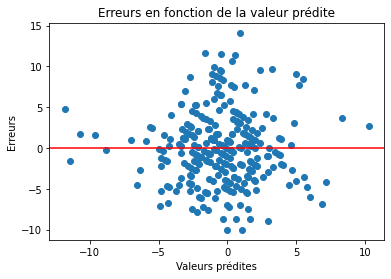

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Supposons que new_data est déjà défini et importé correctement
# df = new_data[new_data.index<"2017-03-01"]

# Initialisation du modèle de régression
model = LinearRegression()

# Pour stocker les résultats de la régression
results = []

# Préparation des données
y = df["Austria_5y"].shift(-5)
X = df.drop(columns=["Austria_5y"]).iloc[:-5] # On enlève la colonne et les 5 dernières lignes pour correspondre à y
y = y.dropna() # Suppression des NaN résultant du shift
X = X.to_numpy()
y = y.to_numpy()

# Vérification si X et y ont des dimensions compatibles pour la régression
if X.shape[0] == y.shape[0]:
    model.fit(X, y)
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)  # Calcul de la MSE
    rmse = np.sqrt(mse)  # Calcul de la RMSE
    print(f"MSE: {mse}, RMSE: {rmse}")

    # Calcul des erreurs
    errors = y - predictions

    # Tracé des erreurs en fonction des valeurs prédites
    plt.scatter(predictions, errors)
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Erreurs')
    plt.title('Erreurs en fonction de la valeur prédite')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()
else:
    print("Les dimensions de X et y ne correspondent pas.")


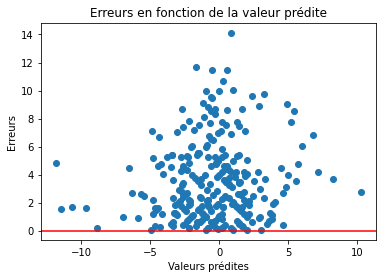

In [135]:
# Calcul des erreurs
errors = abs(y - predictions)

# Tracé des erreurs en fonction des valeurs prédites
plt.scatter(predictions, errors)
plt.xlabel('Valeurs prédites')
plt.ylabel('Erreurs')
plt.title('Erreurs en fonction de la valeur prédite')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [136]:
df.to_clipboard()

In [137]:
data_manager.data.to_clipboard()

In [139]:
pd.DataFrame(predictions).to_clipboard()

In [140]:
y

array([ -9.,  -6.,  -6.,  -9.,  -5.,   1.,  -5.,  -3.,   0.,  -3.,   2.,
         2.,   4.,   3.,   1.,  -4.,  -3.,  -5.,  -5.,  -4.,  -5.,  -6.,
        -5.,  -1.,  -2.,   4.,   6.,   2.,   1.,  12.,   2.,   3.,   8.,
         5.,  -7.,  -3.,  -2.,  -5.,  -6.,  -1.,   0.,  -1.,  -4.,  -1.,
        -2.,  -2.,  -2.,   0.,  -2.,  -4.,  -5.,  -5.,  -1.,  -1.,   3.,
         2.,   2.,   0.,  -1.,   2.,   2.,   3.,   5.,   5.,  -1.,   3.,
         2.,  -3.,  -2.,  -4.,  -6.,  -7.,  -4.,  -5.,  -1.,  -1.,   0.,
         0.,   2.,   2.,   2.,   2.,   2.,  -1.,  -3.,  -4.,  -2.,  -3.,
        -1.,   0.,  -2.,  -3.,  -3.,  -3.,  -4.,   0.,   0.,   0.,   0.,
        14.,  14.,  12.,  13.,  13.,   1.,  -7.,  -6.,  -8.,  -9., -12.,
        -6.,  -9., -11., -10.,  -9., -10.,  -6.,   2.,   0.,   3.,   8.,
         6.,   2.,   5.,   3.,   1.,   1.,   2.,  -3.,  -3.,  -7.,  -5.,
        -3.,   1.,  -3.,   0.,  -1.,  -5.,  -7.,  -2.,  -2.,   0.,   4.,
         5.,   2.,   5.,   0.,  -2.,   0.,   3.,  -

In [141]:
df

,Germany_5y,Germany_10y,Germany_30y,Belgium_5y,Belgium_10y,Belgium_30y,Austria_5y,Austria_10y,Austria_30y,Netherlands_5y,...,Netherlands_30y,France_5y,France_10y,France_30y,Spain_5y,Spain_10y,Spain_30y,Italy_5y,Italy_10y,Italy_30y
date,,,,,,,,,,,,,,,,,,,,,
2016-01-22,-6.4,-5.6,-4.8,-7.1,9.8,-4.7,-8.0,-6.0,-2.9,-7.4,...,-4.0,-7.4,-6.5,-4.0,-5.6,-2.3,1.7,-2.6,0.8,6.1
2016-01-25,-6.9,-6.5,-8.0,-7.1,8.1,-7.5,-8.0,-7.3,-6.4,-7.8,...,-7.5,-7.8,-8.1,-7.5,-5.2,-3.3,-1.3,-4.4,-0.7,2.4
2016-01-26,-8.1,-10.3,-12.7,-9.1,4.1,-11.2,-10.0,-10.7,-9.8,-9.4,...,-12.0,-9.4,-11.0,-12.0,-7.4,-6.3,-5.6,-6.6,-5.1,-0.6
2016-01-27,-3.9,-3.8,-4.1,-5.5,-8.1,-6.9,-6.0,-4.9,-0.5,-6.0,...,-3.3,-6.0,-5.5,-3.3,-13.2,-16.9,-17.3,-13.6,-15.2,-12.3
2016-01-28,-2.1,-4.6,-8.0,-3.6,-5.2,-5.9,-3.0,-4.0,-3.4,-3.2,...,-6.6,-3.2,-4.7,-6.6,-7.8,-10.0,-11.3,-5.2,-4.9,-4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-22,-10.7,-9.5,-11.0,-9.5,-12.6,-13.4,-3.0,-6.6,-6.7,-5.9,...,-10.7,-5.9,-9.3,-10.7,5.4,-0.2,-0.6,3.1,-5.0,-8.3
2017-02-23,-14.1,-11.7,-13.9,-10.3,-9.7,-10.6,-7.0,-8.7,-10.4,-10.3,...,-14.0,-10.3,-9.8,-14.0,7.1,8.1,7.9,8.9,7.5,4.0
2017-02-24,-13.5,-11.6,-14.6,-10.4,-11.6,-15.8,-10.0,-14.9,-14.6,-13.3,...,-15.4,-13.3,-15.3,-15.4,26.2,6.7,-2.7,6.2,0.7,-2.8


In [146]:
predictions = model.predict(df.drop(columns=["Austria_5y"]).iloc[:-5])

In [147]:
predictions

array([-4.40888318e+00, -4.82845554e+00, -4.40075842e+00, -1.44169595e+00,
       -1.30435442e+00,  7.52598455e-02, -6.29453071e-02,  2.06264195e+00,
       -2.11130008e+00, -2.10395091e+00, -3.39604040e+00, -1.28570305e+00,
       -1.51993914e+00,  3.82515616e+00,  4.99896445e+00,  1.42033392e+00,
       -1.56385921e+00, -2.38224170e+00, -2.86273098e+00, -4.27297984e+00,
       -1.93199744e-01,  1.46765947e+00,  2.20089531e-01, -2.92161915e-01,
       -6.13453079e-01,  1.80711040e+00,  2.01959496e-01,  3.10519618e-01,
        2.15172155e+00,  2.38740606e+00,  2.96747360e-01,  3.01837890e+00,
        4.85622643e+00,  1.50819944e+00, -6.23816685e-02, -8.37280568e-01,
       -3.24574329e+00, -4.94205896e+00, -2.72287662e+00, -8.37082695e-01,
       -2.72591826e+00, -2.56557628e+00, -2.07511226e+00, -9.45998230e-01,
       -1.42073903e+00,  2.24575314e-01,  4.33941118e-01,  1.61194003e+00,
       -1.07103105e-01, -1.85267421e-02, -2.39719195e-01,  4.05506952e-01,
        9.15896123e-01,  

In [145]:
df.drop(columns=["Austria_5y"]).iloc[:-5]

,Germany_5y,Germany_10y,Germany_30y,Belgium_5y,Belgium_10y,Belgium_30y,Austria_10y,Austria_30y,Netherlands_5y,Netherlands_10y,Netherlands_30y,France_5y,France_10y,France_30y,Spain_5y,Spain_10y,Spain_30y,Italy_5y,Italy_10y,Italy_30y
date,,,,,,,,,,,,,,,,,,,,
2016-01-22,-6.4,-5.6,-4.8,-7.1,9.8,-4.7,-6.0,-2.9,-7.4,-6.5,-4.0,-7.4,-6.5,-4.0,-5.6,-2.3,1.7,-2.6,0.8,6.1
2016-01-25,-6.9,-6.5,-8.0,-7.1,8.1,-7.5,-7.3,-6.4,-7.8,-8.1,-7.5,-7.8,-8.1,-7.5,-5.2,-3.3,-1.3,-4.4,-0.7,2.4
2016-01-26,-8.1,-10.3,-12.7,-9.1,4.1,-11.2,-10.7,-9.8,-9.4,-11.0,-12.0,-9.4,-11.0,-12.0,-7.4,-6.3,-5.6,-6.6,-5.1,-0.6
2016-01-27,-3.9,-3.8,-4.1,-5.5,-8.1,-6.9,-4.9,-0.5,-6.0,-5.5,-3.3,-6.0,-5.5,-3.3,-13.2,-16.9,-17.3,-13.6,-15.2,-12.3
2016-01-28,-2.1,-4.6,-8.0,-3.6,-5.2,-5.9,-4.0,-3.4,-3.2,-4.7,-6.6,-3.2,-4.7,-6.6,-7.8,-10.0,-11.3,-5.2,-4.9,-4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-15,3.3,7.8,11.5,0.3,2.4,2.5,7.0,14.2,3.8,6.2,11.4,3.8,6.2,11.4,-4.4,-1.3,-1.9,2.5,-0.5,-3.9
2017-02-16,1.4,3.7,7.0,-0.8,-0.1,2.0,2.8,9.7,3.2,0.1,6.9,3.2,0.1,6.9,-2.1,-2.5,-3.2,4.2,-2.6,-6.4
2017-02-17,-2.1,-1.8,-2.3,-3.9,-6.2,-4.3,-0.5,1.6,0.7,-4.6,-3.1,0.7,-4.6,-3.1,-3.4,-7.0,-7.7,-1.1,-8.2,-13.9


In [151]:
strategy = StrategyLinearRegression("Austria_5y",5,new_data[new_data.index<"2017-03-01"],new_data[new_data.index<"2017-03-01"])

In [152]:
strategy.train()

In [161]:
list_trades = strategy.trade_creation(-2, 2)


In [163]:
back = Backtest(list_trades, new_data[new_data.index<"2017-03-01"])


In [164]:
back.gather_all_trades()

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Index(['Predicted Value'], dtype='object')] of type Index